In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    roc_curve, 
    auc
)
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV,
    cross_validate
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate

# **Data Preprocessing**

In [2]:
# Load the dataset
data= pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

# Display the first few rows of the dataset
print('Head:\n')
data.head()

Head:



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Print the shape of the dataset
print("The shape of the dataset is : ", data.shape)

The shape of the dataset is :  (918, 12)


In [4]:
# Display a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Generate descriptive statistics for numerical columns
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Calculate the total number of missing values in each column
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# Calculate and print the number of duplicated rows
print('Duplicated:\n', data.duplicated().sum())

Duplicated:
 0


In [8]:
# Count the number of records for each class of HeartDisease
class_counts = data['HeartDisease'].value_counts()

# Create a table
table = pd.DataFrame({'HeartDisease': class_counts.index, 'Count': class_counts.values})

# Print the table in a pretty format
print(tabulate(table, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════════╤═════════╕
│    │   HeartDisease │   Count │
╞════╪════════════════╪═════════╡
│  0 │              1 │     508 │
├────┼────────────────┼─────────┤
│  1 │              0 │     410 │
╘════╧════════════════╧═════════╛


HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


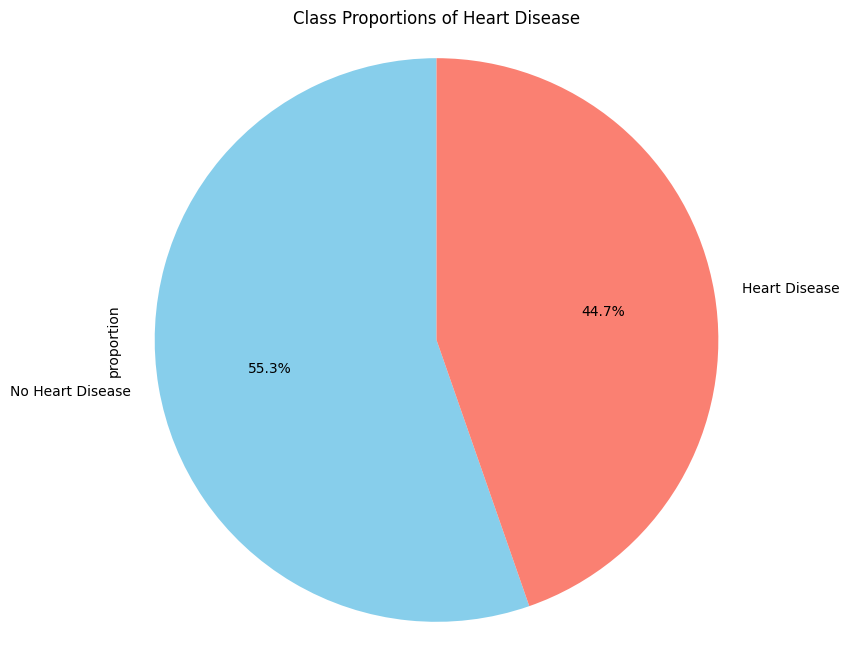

In [9]:
# Calculate class proportions
class_proportion = data['HeartDisease'].value_counts(normalize=True)

print(class_proportion)
# Create a pie chart
plt.figure(figsize=(8, 8))
class_proportion.plot(kind='pie', 
                      labels=['No Heart Disease', 'Heart Disease'], 
                      autopct='%1.1f%%', 
                      startangle=90, 
                      colors=['skyblue', 'salmon'])
plt.title('Class Proportions of Heart Disease')
plt.axis('equal')

# Show the plot
plt.show()

In [10]:
# Identify categorical/object columns
columns_to_check = data.select_dtypes(include=['object', 'category']).columns

# Print the unique values for each identified column
for column in columns_to_check:
    print(f"Unique values in {column}: {data[column].unique()}")

Unique values in Sex: ['M' 'F']
Unique values in ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
Unique values in RestingECG: ['Normal' 'ST' 'LVH']
Unique values in ExerciseAngina: ['N' 'Y']
Unique values in ST_Slope: ['Up' 'Flat' 'Down']


In [11]:
# Convert the 'Sex' column to numerical values
data['Sex'] = data['Sex'].replace({'M': 0, 'F': 1})# 'M' --> 0, and 'F' --> 1


# Convert the 'ExerciseAngina' column to numerical values.
data['ExerciseAngina'] = data['ExerciseAngina'].replace({'Y': 1, 'N': 0}) # 'Y' --> 1, and 'N' --> 0

# Convert the 'ChestPainType' column to numerical values.
data['ChestPainType'] = data['ChestPainType'].replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}) # 'ATA' → 0, 'NAP' → 1, 'ASY' → 2, 'TA' → 3

# Convert the 'RestingECG' column to numerical values.
data['RestingECG'] = data['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2}) # 'Normal' → 0, 'ST' → 1, 'LVH' → 2.

# Convert the 'ST_Slope' column to numerical values.
data['ST_Slope'] = data['ST_Slope'].replace({'Down': 0, 'Flat': 1, 'Up': 2}) # 'Down' → 0, 'Flat' → 1, 'Up' → 2.

# Display the data types of all columns in the dataset after the conversions
print(data.dtypes)

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object


/tmp/ipykernel_30/3138744498.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'M': 0, 'F': 1})# 'M' --> 0, and 'F' --> 1
/tmp/ipykernel_30/3138744498.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ExerciseAngina'] = data['ExerciseAngina'].replace({'Y': 1, 'N': 0}) # 'Y' --> 1, and 'N' --> 0
/tmp/ipykernel_30/3138744498.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infe

In [12]:
# Display the data in the dataset after the conversions
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,2,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,2,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,2,0


In [13]:
# Load and preprocess the data
df = data  

# Separate features and target
X = df.drop(columns=['HeartDisease']).values
y = df['HeartDisease'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Training and Evaluation**


Metrics (Testing):
Precision: 0.82
Recall: 0.81
F1 Score: 0.81


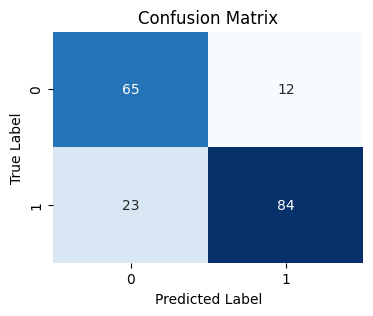

In [14]:
# Initialize a BaggingClassifier using a DecisionTreeClassifier as the base estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=5, random_state=42)

# Fit the bagging model to the training data
bagging_model.fit(X_train, y_train)

# Predict the target values for the test data using the trained model
y_test_pred = bagging_model.predict(X_test)

# Evaluate the performance of the model on the test set using precision, recall, and F1-score
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics
print("\nMetrics (Testing):")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the confusion matrix plot
plt.show()


# **Model Tuning and Evaluation**

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_est

Best Hyperparameters: {'base_estimator__max_depth': 5, 'base_estimator__min_samples_split': 2, 'n_estimators': 50}

Metrics (Testing) with Best Model:
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


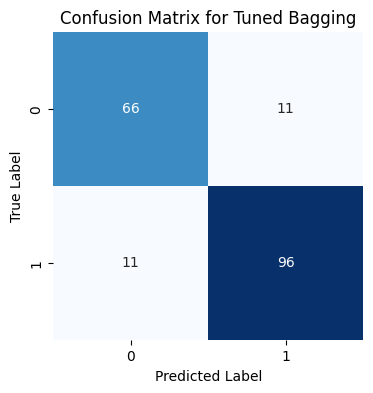

In [16]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [20, 50, 100],
    'base_estimator__max_depth': [5, 10, 15],
    'base_estimator__min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with the BaggingClassifier and the parameter grid
grid_search = GridSearchCV(bagging_model, param_grid, scoring='f1', cv=3, n_jobs=-1)

# Fit the GridSearchCV to the training data to find the best hyperparameters.
grid_search.fit(X_train, y_train)

# Extract the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Use the best model to predict the target values
y_test_pred = best_model.predict(X_test)

# Evaluate the best model's performance on the test set using precision, recall, and F1-score
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the evaluation metrics for the best model
print("\nMetrics (Testing) with Best Model:")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")

# Compute the confusion matrix for the best model's predictions
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Tuned Bagging')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the confusion matrix plot.
plt.show()

# **Algorithms Comparison**

In [17]:
# Initialize the models
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)


# List of models for iteration
models = {
    "K-Nearest Neighbors": knn_model,
    "Random Forest": rf_model,
    "Bagging with Decision Tree": best_model
}

# Evaluate models using Cross-Validation
results = {}
scoring = ['precision', 'recall', 'f1']

for model_name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=3, scoring=scoring)
    results[model_name] = {
        'Precision': cv_results['test_precision'].mean(),
        'Recall': cv_results['test_recall'].mean(),
        'F1 Score': cv_results['test_f1'].mean()
    }

# Print the results
print("\nModel Evaluation Metrics:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")


Model Evaluation Metrics:

K-Nearest Neighbors:
Precision: 0.71
Recall: 0.77
F1 Score: 0.74

Random Forest:
Precision: 0.86
Recall: 0.91
F1 Score: 0.88

Bagging with Decision Tree:
Precision: 0.84
Recall: 0.92
F1 Score: 0.88


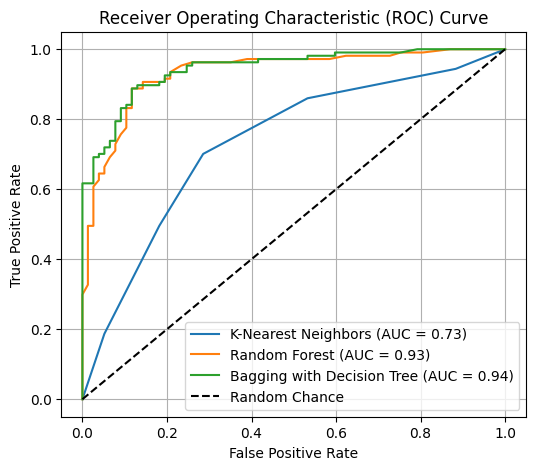

In [18]:
# Prepare for plotting
plt.figure(figsize=(6, 5))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

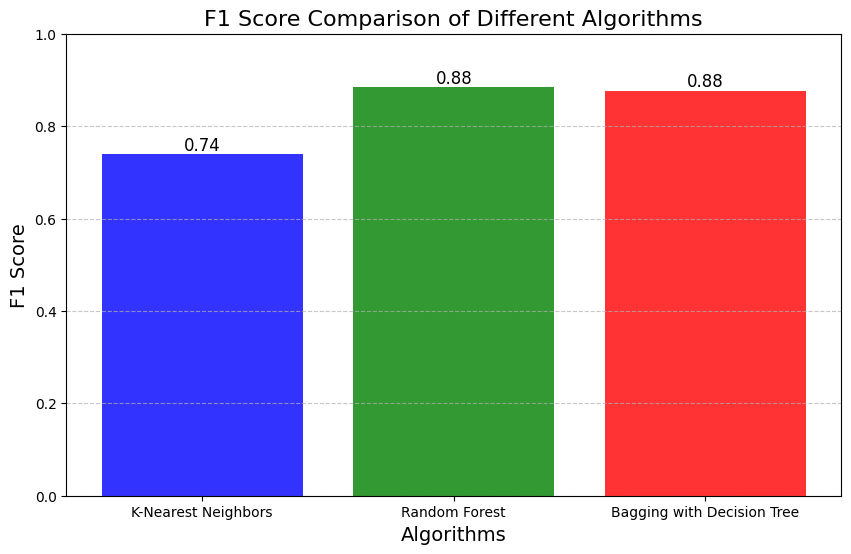

In [19]:
# Extract F1 scores
accuracy_scores = [metrics['F1 Score'] for metrics in results.values()]

# Extract algorithm names
algorithms = list(results.keys())

# Create a bar chart to compare F1 scores of different algorithms
plt.figure(figsize=(10, 6)) 
colors = ['blue', 'green', 'red']
bars = plt.bar(algorithms, accuracy_scores, color=colors, alpha=0.8)
plt.title('F1 Score Comparison of Different Algorithms', fontsize=16)
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar chart.
plt.show()